In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Free base-maps for static maps using Geopandas and Contextily

In [135]:
# Read in the conflict points and the boundary shape files using geopandas
conf_data = gpd.read_file("NorthDarfurConf.shp")
ND_Boundary = gpd.read_file("NorthDarfurBoundary.shp")

In [136]:
conf_data.columns

Index(['event_id_c', 'event_date', 'year', 'event_type', 'sub_event_',
       'actor1', 'actor2', 'location', 'latitude', 'longitude', 'geo_precis',
       'source', 'source_sca', 'notes', 'fatalities', 'color', 'geometry'],
      dtype='object')

In [137]:
ND_Boundary.columns

Index(['OBJECTID', 'admin1Name', 'admin1Pcod', 'admin1RefN', 'admin1AltN',
       'admin1Al_1', 'admin0Name', 'admin0Pcod', 'date', 'validOn', 'validTo',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

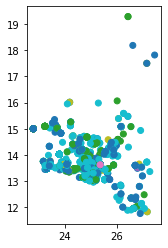

In [139]:
# we specify the column that is going to be used for the symbology
conf_data.plot(column = 'event_type');

In [140]:
# get the uniques values in event_type column
categories = conf_data.event_type.unique()
# create a list for our custom colors
c = ['m', 'k', 'g', 'r', 'y', 'c']
# create a dictionary to combine both lists, categories are keys and # color codes are values
colorDict = dict(zip(cat,c))
print(colorDict)

{'Battles': 'm', 'Explosions/Remote violence': 'k', 'Strategic developments': 'g', 'Violence against civilians': 'r', 'Protests': 'y', 'Riots': 'c'}


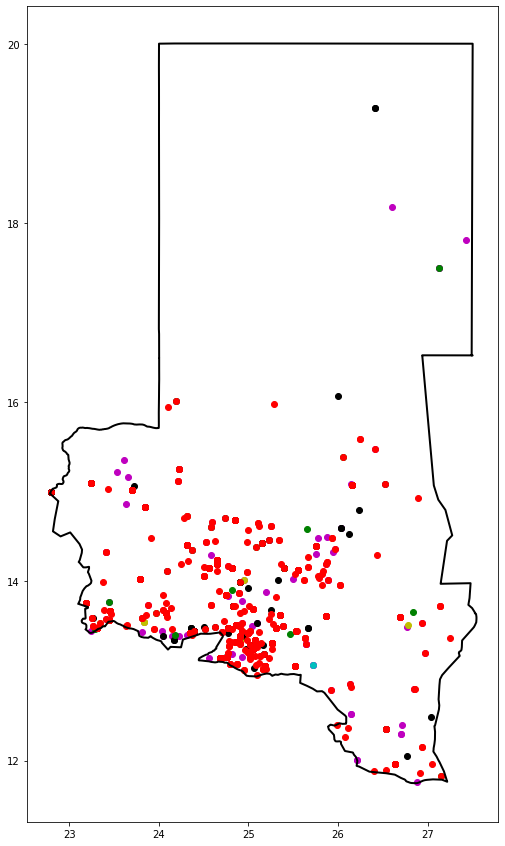

In [142]:
# plot the state's boundary with black edge color only and line width of 2
ax = ND_Boundary.geometry.boundary.plot(figsize = (10,15), color = None, edgecolor = 'K', linewidth=2)
# Loop through each event type group 
for eventType, data in conf_data.groupby('event_type'):
    color  = colorDict[eventType]
    data.plot(ax = ax,  color = color, label = eventType)

In [143]:
print(ctx.providers.keys())

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])


In [144]:
print(ctx.providers.OpenStreetMap.keys())

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])


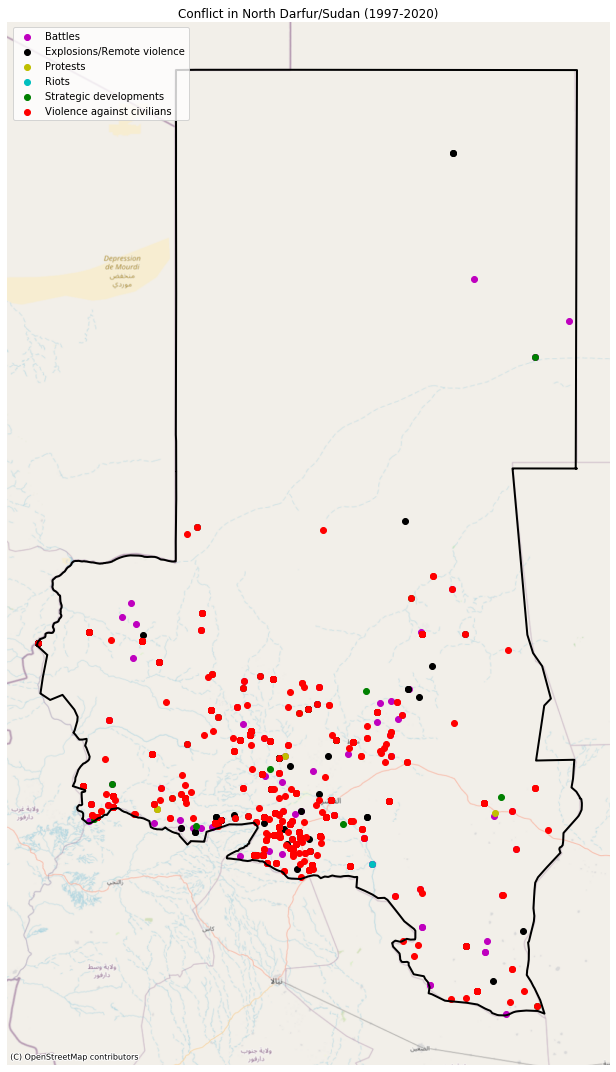

In [145]:
# plot the state's boundary with black edge color only and line width of 2
ax = ND_Boundary.geometry.boundary.plot(figsize = (10,15), color = None, edgecolor = 'K', linewidth=2)
# Loop through each event type group 
for eventType, data in conf_data.groupby('event_type'):
    color  = colorDict[eventType]
    data.plot(ax = ax,  color = color, label = eventType)

# add open street map basemap
ctx.add_basemap(ax, crs = ND_Boundary.crs, url = ctx.providers.OpenStreetMap.Mapnik)

ax.legend(bbox_to_anchor = (0.31,1), prop={'size':10}) # set legend's position and size
ax.set(title="Conflict in North Darfur/Sudan (1997-2020)") # add a title to the map
ax.set_axis_off() # remove the axis ticks 
plt.tight_layout() # adjust the padding between figure edges
plt.savefig('norhtDarfur_conf_OSM_Map.png') # Save the map as an image
plt.show()